# <font color=blue> Step by Step tutorial to automate HEC-RAS simulations</font>

__Prerequisite: Import the following packages for HEC-RAS automation__

In [40]:
import win32com.client
import os, numpy, time
import pyautogui

__Step 1: Open a HEC-RAS window__

In [41]:
hec = win32com.client.Dispatch("RAS507.HECRASController")
hec.ShowRas() # show HEC-RAS window

__Step 2: Open a project file__

In [42]:
mypath = r'E:\ai\try1\RAS_Python\Less_Models\DEEP CREEK'
for subdir, dirs, files in os.walk(mypath):
    for name in files:
        if name.endswith(".prj"):
            projpath = subdir + os.sep + name
            print (projpath)
            hec.Project_Open(projpath)

E:\ai\try1\RAS_Python\Less_Models\DEEP CREEK\DEEP CREEK.prj


__Step 3: Open geometric data editor__

In [43]:
hec.Edit_GeometricData()

__Step 4: Make changes to geometry__

In [45]:
    time.sleep(3)
    pyautogui.press('alt')
    pyautogui.press('right')
    pyautogui.press('right')
    pyautogui.press('right')
    pyautogui.press('right')
    pyautogui.press('right')
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('enter')
    pyautogui.press('tab')
    pyautogui.press('enter')
    pyautogui.press('enter')
    pyautogui.hotkey('shift', 'tab')
    pyautogui.press('enter')
    pyautogui.press('tab')
    pyautogui.press('tab')
    pyautogui.press('enter')

__Step 5: Run a steady flow simulation__

In [48]:
# to be populated: number and list of messages, blocking mode
NMsg,TabMsg,block = None,None,True
# computations of the current plan
v1,NMsg,TabMsg,v2 = hec.Compute_CurrentPlan(NMsg,TabMsg,block)
time.sleep(3)

__Step 6: Create output table__

In [49]:
a1, RivNm = hec.Geometry_GetRivers(1,)
print(RivNm[0])
b1,b2,RchNm=hec.Geometry_GetReaches(1,1,)
print(RchNm[0])
NProf = hec.SteadyFlow_nProfile
print("No. of Profiles: %s" % (NProf))

# ID numbers of the river and the reach
RivID,RchID = 1,1
# to be populated: number of nodes, list of RS and node types
NNod,TabRS,TabNTyp = None,None,None
# reading project nodes: cross-sections, bridges, culverts, etc.
v1,v2,NNod,TabRS,TabNTyp = hec.Geometry_GetNodes(RivID,RchID,NNod,TabRS,TabNTyp)

# ID of output variables: WSE, ave velocity
WSE_id,QTot_id, Prof_id, StaLft_id, StaRgt_id= 2,9,1,36,37
TabWSE = numpy.empty([NNod,NProf],dtype=float) # NumPy array for WSE
TabQTot = numpy.empty([NNod,NProf],dtype=float) # NumPy array for velocities
TabProf = numpy.empty([NProf],dtype=str)
TabStaLft = numpy.empty([NNod], dtype=float)
TabStaRgt = numpy.empty([NNod], dtype=float)
for i in range(0,NNod): # reading over nodes
    for j in range(0,NProf):
        if TabNTyp[i] == "": # simple cross-section
        # reading single water surface elevation
            TabWSE[i][j],v1,v2,v3,v4,v5,v6 = hec.Output_NodeOutput(RivID,RchID,i+1,0,j+1,WSE_id)
        # reading single velocity
            TabQTot[i][j],v1,v2,v3,v4,v5,v6 = hec.Output_NodeOutput(RivID,RchID,i+1,0,j+1,QTot_id)
    TabStaLft[i],v1,v2,v3,v4,v5,v6 = hec.Output_NodeOutput(RivID,RchID,i+1,0,1,StaLft_id)   #Stations at 10-Yr WSEL
    TabStaRgt[i],v1,v2,v3,v4,v5,v6 = hec.Output_NodeOutput(RivID,RchID,i+1,0,1,StaRgt_id)
#    print(TabStaLft[i])
hec.Project_Save()

DEEP CREEK      
Reach-1         
No. of Profiles: 7


__Step 7: Output to a text file__

In [51]:
def header(path, NRS, ResRivNm, ResRchNm, ResNProf):
    f = open(path, 'w')
    f.write("Profile Output Table - Table 1 \n")
    f.write("HEC-RAS  Plan: Multiple   River: %s   Reach: %7s\n\n" % (ResRivNm[0],ResRchNm[0]))
    f.write("# Rivers            = 1 \n")
    f.write("# Hydraulic Reaches = 1 \n")
    f.write("# River Stations    = %s \n" % (NRS))
    f.write("# Plans             = 1 \n")
    f.write("# Profiles          = %s \n\n" % (ResNProf))
    f.close()

def sc1_ShowNodes(path, NRS, ListRS,ListTyp,ResWSE,ResQTot,ResNProf,ResRchNm):
    f = open(path,'a')
    #f.write ("Number of nodes: %10d\n" % (NRS,))
    f.write ("%6s %20s %16s %11s\n" % ('Reach', 'River Sta', "W.S. Elev", "Q Total "))
    f.write ("                                        (ft)      (cfs) \n\n")
    for i in range(0,NRS):
        for j in range(0,ResNProf):
            if ListTyp[i] == "":
                f.write (" %5s %8s %17.2f %10.2f\n" % (ResRchNm[0],ListRS[i],ResWSE[i][j],ResQTot[i][j]))
            else:
                f.write ("%11s %14s\n" % (ListTyp[i],ListRS[i]))
        f.write("\n")
    f.close()
for name in files:
    if name.endswith("XsOutData.txt"):
        txtpath = subdir + os.sep + name
        print (txtpath)
        header(txtpath, NNod, RivNm, RchNm, NProf)
        sc1_ShowNodes(txtpath, NNod, TabRS, TabNTyp, TabWSE, TabQTot,NProf,RchNm )

E:\ai\try1\RAS_Python\Less_Models\DEEP CREEK\_XsOutData\XsOutData.txt


__Step 8: Close HEC-RAS window__

In [53]:
hec.QuitRas() # close HEC-RAS
del hec # delete HEC-RAS controller

# __An Example Project. RASomate__
By implementing all the concepts from this tutorial, a software can be created which can be shared with other engineers in the team.

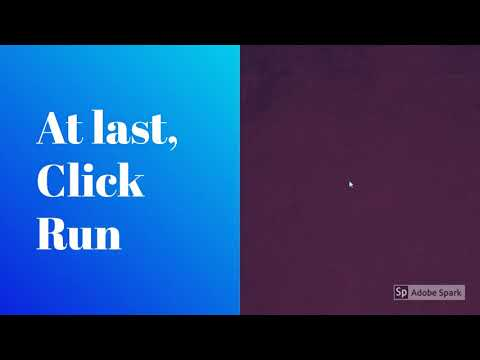

In [47]:
from IPython.display import YouTubeVideo
YouTubeVideo('dJEiUSRTZY4', width = 560, height = 315)